# Visualization of evaluators

Visualization of evaluators over time. X-axis represents the current generation, Y-axis represents the actual values.

In [1]:
from algorithms import *
from evaluators import *
import matplotlib.pyplot as plt
import numpy as np
import warnings

np.random.seed(42)
warnings.filterwarnings("ignore")

## Visualization definition

In [2]:
def visualize_fitness(optimizer: object):

    all_generations = []
    all_fitness = []
    for i in range(1, 6):
        # If file is not found, stop the loop
        try:
            all_generations.append(np.loadtxt(f"drawer/data/export_{optimizer.__class__.__name__}_generations_{i}.csv", delimiter=",")[:, 0])
            
            fitness = np.loadtxt(f"drawer/data/export_{optimizer.__class__.__name__}_generations_{i}.csv", delimiter=",")[:, 1]
            # Replace all nan values with 0.5
            fitness = np.nan_to_num(fitness, nan=0.5)
            if optimizer.__class__.__name__ == "GreyWolfOptimizer" or optimizer.__class__.__name__ == "WhaleOptimizationAlgorithm":
                fitness = 1 - fitness / np.max(fitness)
            else:   
                fitness = 1 - fitness / np.min(fitness)
            
            all_fitness.append(fitness)
            #all_fitness.append(np.loadtxt(f"drawer/data/export_{optimizer.__class__.__name__}_generations_{i}.csv", delimiter=",")[:, 1])
        except:
            print("Stopping loop at i = ", i, " because file was not found")
            break

    fig, axes = plt.subplots(1, 1, sharey=True)

    for i, fitness in enumerate(all_fitness):
        axes.plot(all_generations[i], fitness, color="black", alpha = 0.25)

    mean_fitness = np.mean(all_fitness, axis=0)
    std_fitness = np.std(all_fitness, axis=0)
    fitness_low = mean_fitness - 1.96 * std_fitness
    fitness_high = mean_fitness + 1.96 * std_fitness

    # Plot the fitness over the number of generations
    axes.plot(all_generations[0], mean_fitness, color="red", alpha=1, label='mean fitness')
    axes.fill_between(all_generations[0], fitness_low, fitness_high, color='red', alpha=0.05)

    axes.set_ylim([0, 1])
    plt.xlabel("Number of generations")
    plt.ylabel("Fitness")
    plt.title(f"{optimizer.__class__.__name__} -  best fitnesses")
    plt.legend()
    plt.show()

## Grey Wolf optimziation visualization

In [3]:
gw_param_options = {
    'population': [10, 15]
}

gw_hyper = HyperSearch(GreyWolfOptimizer, GoalEvaluator, is_export=True).execute(**gw_param_options)
print("Hyper parameters", gw_hyper.best_params, "Best seed", gw_hyper.best_seed)

Hyper search start [steps=8]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Converged after 3
Hyper parameters {'population': 10} Best seed 42


In [4]:
gw_hyper.optimize_top5(gw_hyper.best_params['population'], 100)

This algorithm is:  type
[1] Best Fitness: 1500000
[2] Best Fitness: 1400000
[17] Best Fitness: 1000000
[22] Best Fitness: 130502.87622207374
[27] Best Fitness: 127132.47174264313
[31] Best Fitness: 126972.8676989085
Best Fitness: 126972.8676989085
Exporting to file:  drawer/data/export_GreyWolfOptimizer_generations_1.csv
This algorithm is:  type
[1] Best Fitness: 1500000
[5] Best Fitness: 1300000
[9] Best Fitness: 1000000
[17] Best Fitness: 57235.67606561278
[51] Best Fitness: 17708.114390306677
[53] Best Fitness: 3391.8206371558645
[65] Best Fitness: 1092.098245427129
Best Fitness: 1092.098245427129
Exporting to file:  drawer/data/export_GreyWolfOptimizer_generations_2.csv
This algorithm is:  type
[1] Best Fitness: 1500000
[2] Best Fitness: 1300000
[21] Best Fitness: 960981.6156046505
[22] Best Fitness: 405389.2752871009
[24] Best Fitness: 26237.421235979287
[28] Best Fitness: 7016.709096829471
Best Fitness: 7016.709096829471
Exporting to file:  drawer/data/export_GreyWolfOptimizer_g

Stopping loop at i =  4  because file was not found


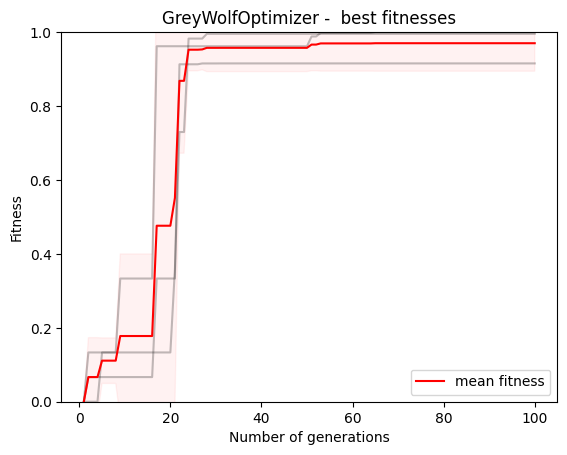

In [5]:
visualize_fitness(GreyWolfOptimizer(GoalEvaluator))

## Whale optimization algorithm visualization

In [6]:
woa_param_options = {
    'generations': 15,
    'mutation_strength': np.linspace(0.1, 0.4, 3),
    'population': [10, 15]
}

woa_hyper = HyperSearch(WhaleOptimizationAlgorithm, GoalEvaluator, is_export=True).execute(**woa_param_options)
print("Hyper parameters", woa_hyper.best_params, "Best seed", woa_hyper.best_seed)

Hyper search start [steps=24]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Converged after 3
Hyper parameters {'mutation_strength': 0.25, 'population': 10} Best seed 1


In [7]:
woa_evaluator = woa_hyper.optimize_top5(woa_hyper.best_params['population'], 200)

This algorithm is:  type
[1] Best Fitness: 1500000
[2] Best Fitness: 1400000
[3] Best Fitness: 1300000
[9] Best Fitness: 1000000
[14] Best Fitness: 716150.9684921894
[40] Best Fitness: 548507.6520574682
[79] Best Fitness: 165692.042250562
[80] Best Fitness: 3284.2711013230164
[82] Best Fitness: 568.5543293358985
[83] Best Fitness: 0.11752588050532681
[84] Best Fitness: 0.009430743782760194
[94] Best Fitness: 0.0076312982327051216
[95] Best Fitness: 0.0009094737832532647
Best Fitness: 0.0009094737832532647
Exporting to file:  drawer/data/export_WhaleOptimizationAlgorithm_generations_1.csv
This algorithm is:  type
[1] Best Fitness: 1500000
[2] Best Fitness: 1400000
[3] Best Fitness: 1300000
[7] Best Fitness: 1000000
[13] Best Fitness: 108368.579255647
[17] Best Fitness: 25.23946259986458
[18] Best Fitness: 4.213986983803843
[21] Best Fitness: 3.51530235190009
[55] Best Fitness: 2.7845321635009674
[56] Best Fitness: 2.4621127496765265
[57] Best Fitness: 1.6636526126716755
[65] Best Fitnes

Stopping loop at i =  4  because file was not found


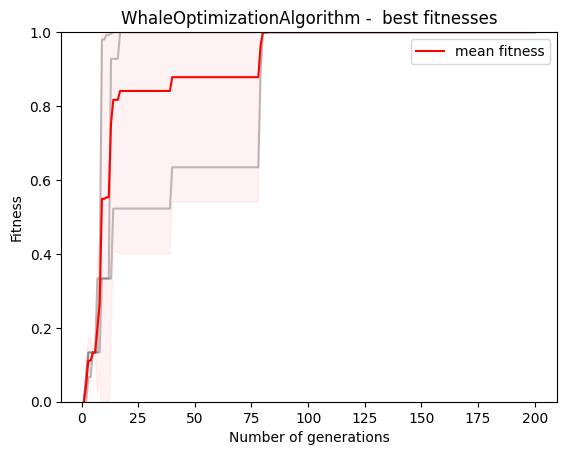

In [8]:
visualize_fitness(WhaleOptimizationAlgorithm(GoalEvaluator))

## Genetic Algorithm visualization

In [9]:
ga_param_options = {
    'generations': 10,
    'population': [15, 20],
    'mutation_rate': np.linspace(0.05, 0.5, 4),
    'elite_percentage': [0.15]
}

ga_hyper = HyperSearch(GeneticAlgorithm, GoalEvaluator, is_export=True).execute(**ga_param_options)
print("Hyper parameters", ga_hyper.best_params, "Best seed", ga_hyper.best_seed)

Hyper search start [steps=32]


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Hyper parameters {'elite_percentage': 0.15, 'mutation_rate': 0.5, 'population': 20} Best seed 555


In [10]:
ga_evaluator = ga_hyper.optimize_top5(50, 100, seed=12)

This algorithm is:  type
[0] Update best with -1500000.00000
[1] Update best with -1300000.00000
[4] Update best with -1000000.00000
[11] Update best with -257403.60396
[15] Update best with -181096.47654
[19] Update best with -158135.35521
[22] Update best with -68425.31516
[23] Update best with -48899.61460
[24] Update best with -29613.15041
[26] Update best with -1388.75594
[39] Update best with -1382.57442
[42] Update best with -1381.36988
[48] Update best with -1377.45918
[52] Update best with -1376.04982
[54] Update best with -1372.80926
Exporting to file:  drawer/data/export_GeneticAlgorithm_generations_1.csv
This algorithm is:  type
[0] Update best with -1500000.00000
[10] Update best with -1400000.00000
[18] Update best with -1000000.00000
[34] Update best with -88158.26783
[35] Update best with -30791.09590
[41] Update best with -8723.14346
[45] Update best with -1498.69889
[47] Update best with -1498.04105
[49] Update best with -1497.61227
[54] Update best with -1487.92483
[

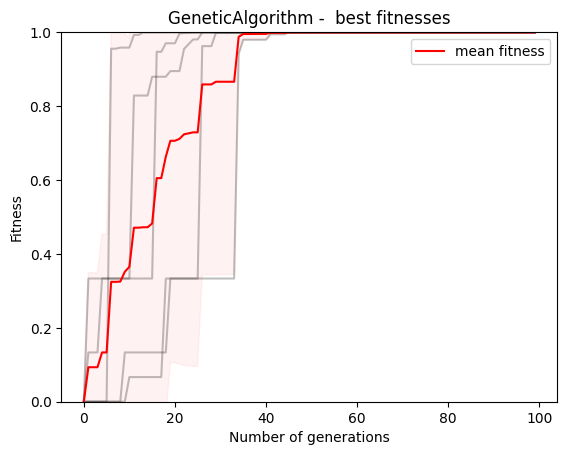

In [11]:
visualize_fitness(GeneticAlgorithm(GoalEvaluator))